In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
import pandas as pd

In [2]:
keras.utils.set_random_seed(21)

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

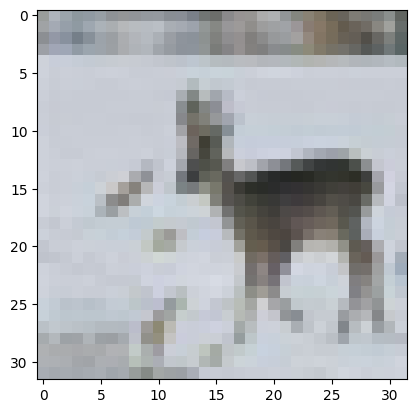

In [4]:
plt.imshow(X_train[20])

In [5]:
len(X_train), len(X_test)

(50000, 10000)

In [6]:
X_valid, X_test, y_valid, y_test = tts(X_test, y_test, test_size=0.2, random_state=21)

In [7]:
len(X_test), len(X_valid)

(2000, 8000)

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_train = X_train/255
X_test = X_test/255
X_valid = X_valid/255

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)

# Exp 1

In [11]:
base_vgg16 = keras.applications.VGG16(weights = "imagenet", include_top=False, input_shape=(32,32,3), pooling = 'avg')

Metal device set to: Apple M1


In [12]:
inputs = keras.Input(shape = (32,32,3))
x= base_vgg16(inputs)
x=keras.layers.Dense(1024, activation="relu", name='Dense_1')(x)
x=keras.layers.Dense(2046, activation='relu', name='Dense_2')(x)
x=keras.layers.Dense(512, activation='relu', name='Dense_3')(x)
x=keras.layers.Dense(256, activation='relu', name='Dense_4')(x)
output=keras.layers.Dense(10, activation='softmax', name='Output')(x)

model = keras.models.Model(inputs = inputs, outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 Dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 Dense_2 (Dense)             (None, 2046)              2097150   
                                                                 
 Dense_3 (Dense)             (None, 512)               1048064   
                                                                 
 Dense_4 (Dense)             (None, 256)               131328    
                                                                 
 Output (Dense)              (None, 10)                2570  

In [13]:
model.compile(keras.optimizers.legacy.Adam(0.0005), loss="categorical_crossentropy",
              metrics=[keras.metrics.F1Score(), keras.metrics.Precision(), keras.metrics.Recall()],)

In [14]:
X_dataset_train = tf.data.Dataset.from_tensor_slices(X_train)
y_dataset_train = tf.data.Dataset.from_tensor_slices(y_train)

dataset_train = tf.data.Dataset.zip((X_dataset_train, y_dataset_train))

In [15]:
X_dataset_valid = tf.data.Dataset.from_tensor_slices(X_valid)
y_dataset_valid = tf.data.Dataset.from_tensor_slices(y_valid)

dataset_valid = tf.data.Dataset.zip((X_dataset_valid, y_dataset_valid))

In [16]:
dataset_train = dataset_train.shuffle(500).batch(256).prefetch(tf.data.experimental.AUTOTUNE)
dataset_valid = dataset_valid.shuffle(500).batch(256).prefetch(tf.data.experimental.AUTOTUNE)

In [17]:
X_dataset_test = tf.data.Dataset.from_tensor_slices(X_test)
y_dataset_test = tf.data.Dataset.from_tensor_slices(y_test)

dataset_test = tf.data.Dataset.zip((X_dataset_test, y_dataset_test))
dataset_test = dataset_test.shuffle(500).batch(256).prefetch(tf.data.experimental.AUTOTUNE)

In [18]:
history = model.fit(dataset_train, validation_data=dataset_valid, 
                    epochs=50, callbacks=tf.keras.callbacks.TensorBoard())

Epoch 1/50
196/196 [==============================] - 88s 445ms/step - loss: 1.8488 - f1_score: 0.2507 - precision: 0.5354 - recall: 0.0610 - val_loss: 1.4515 - val_f1_score: 0.3445 - val_precision: 0.5775 - val_recall: 0.2018
Epoch 2/50
196/196 [==============================] - 95s 485ms/step - loss: 1.0941 - f1_score: 0.6068 - precision: 0.7731 - recall: 0.4686 - val_loss: 0.8810 - val_f1_score: 0.7138 - val_precision: 0.8223 - val_recall: 0.6085
Epoch 3/50
196/196 [==============================] - 98s 501ms/step - loss: 0.7012 - f1_score: 0.7691 - precision: 0.8468 - recall: 0.7013 - val_loss: 0.7343 - val_f1_score: 0.7641 - val_precision: 0.8340 - val_recall: 0.7003
Epoch 4/50
196/196 [==============================] - 98s 501ms/step - loss: 0.5532 - f1_score: 0.8235 - precision: 0.8800 - recall: 0.7756 - val_loss: 0.6615 - val_f1_score: 0.7988 - val_precision: 0.8535 - val_recall: 0.7583
Epoch 5/50
196/196 [==============================] - 99s 504ms/step - loss: 0.4289 - f1_sco

Epoch 37/50
196/196 [==============================] - 118s 602ms/step - loss: 0.0488 - f1_score: 0.9867 - precision: 0.9883 - recall: 0.9851 - val_loss: 0.9146 - val_f1_score: 0.8308 - val_precision: 0.8441 - val_recall: 0.8233
Epoch 38/50
196/196 [==============================] - 117s 595ms/step - loss: 0.0311 - f1_score: 0.9913 - precision: 0.9924 - recall: 0.9905 - val_loss: 1.1036 - val_f1_score: 0.8295 - val_precision: 0.8374 - val_recall: 0.8225
Epoch 39/50
196/196 [==============================] - 130s 665ms/step - loss: 0.0421 - f1_score: 0.9892 - precision: 0.9903 - recall: 0.9881 - val_loss: 1.0821 - val_f1_score: 0.8328 - val_precision: 0.8387 - val_recall: 0.8250
Epoch 40/50
196/196 [==============================] - 130s 663ms/step - loss: 0.0343 - f1_score: 0.9904 - precision: 0.9917 - recall: 0.9896 - val_loss: 1.0424 - val_f1_score: 0.8356 - val_precision: 0.8435 - val_recall: 0.8299
Epoch 41/50
196/196 [==============================] - 164s 838ms/step - loss: 0.030

In [21]:
eval_hist = model.evaluate(dataset_test)

8/8 [==============================] - 2s 178ms/step - loss: 0.9791 - f1_score: 0.8457 - precision: 0.8520 - recall: 0.8405


<Axes: >

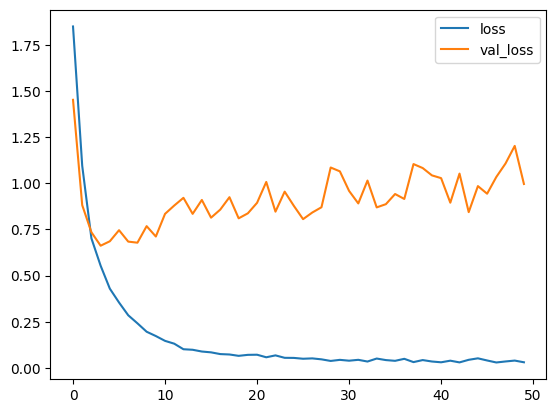

In [53]:
#График изменения функции потерь
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

<Axes: >

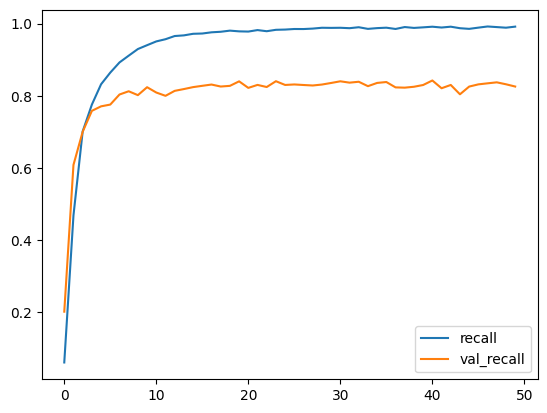

In [54]:
history_df.loc[:, ['recall', 'val_recall']].plot()

<Axes: >

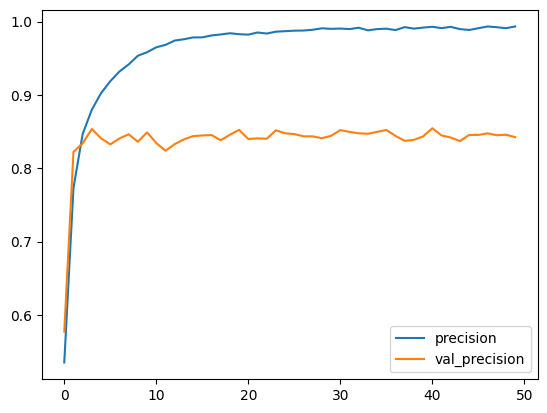

In [55]:
history_df.loc[:, ['precision', 'val_precision']].plot()

In [22]:
preds = model.predict(X_valid)

250/250 [==============================] - 7s 28ms/step


In [23]:
preds = np.argmax(preds, axis=1)
y_valid_idx = np.argmax(y_valid, axis=1)

In [24]:
print(classification_report(y_valid_idx, preds))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       792
           1       0.94      0.87      0.90       811
           2       0.78      0.81      0.79       801
           3       0.64      0.74      0.69       792
           4       0.84      0.83      0.83       804
           5       0.85      0.63      0.73       798
           6       0.83      0.89      0.86       786
           7       0.88      0.87      0.88       801
           8       0.92      0.90      0.91       806
           9       0.80      0.94      0.87       809

    accuracy                           0.83      8000
   macro avg       0.84      0.83      0.83      8000
weighted avg       0.84      0.83      0.83      8000



Text(0.5, 1.0, 'Predicted class:3  Real class:5')

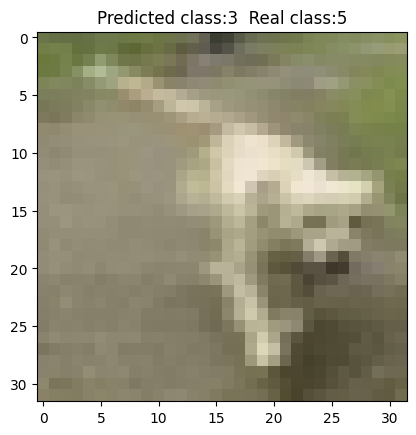

In [25]:
i = 0
plt.imshow(X_valid[i])
plt.title('Predicted class:'+str(preds[i])+'  Real class:'+str(y_valid_idx[i]))

# Exp 2
Добавим коллбеки

In [40]:
base_vgg16 = keras.applications.VGG16(weights = "imagenet", include_top=False, input_shape=(32,32,3), pooling = 'avg')

In [41]:
inputs = keras.Input(shape = (32,32,3))
x= base_vgg16(inputs)
x=keras.layers.Dense(1024, activation="relu", name='Dense_1')(x)
x=keras.layers.Dense(2046, activation='relu', name='Dense_2')(x)
x=keras.layers.Dense(512, activation='relu', name='Dense_3')(x)
x=keras.layers.Dense(256, activation='relu', name='Dense_4')(x)
output=keras.layers.Dense(10, activation='softmax', name='Output')(x)

model_2 = keras.models.Model(inputs = inputs, outputs = output)
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 Dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 Dense_2 (Dense)             (None, 2046)              2097150   
                                                                 
 Dense_3 (Dense)             (None, 512)               1048064   
                                                                 
 Dense_4 (Dense)             (None, 256)               131328    
                                                                 
 Output (Dense)              (None, 10)                2570

In [42]:
model_2.compile(keras.optimizers.legacy.Adam(0.0005), loss="categorical_crossentropy",
              metrics=[keras.metrics.F1Score(), keras.metrics.Precision(), keras.metrics.Recall()])

In [43]:
learn_rate_red=keras.callbacks.ReduceLROnPlateau("val_loss", patience=3, factor = 0.5, min_lr=1e-6)
early_stop = keras.callbacks.EarlyStopping("val_loss", patience=5)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs_2")

In [44]:
history_2 = model_2.fit(dataset_train, validation_data=dataset_valid, 
                    epochs=50, callbacks=[learn_rate_red, early_stop, tensorboard])

Epoch 1/50
196/196 [==============================] - 80s 405ms/step - loss: 2.0358 - f1_score: 0.1779 - precision_3: 0.4863 - recall_3: 0.0226 - val_loss: 1.7031 - val_f1_score: 0.1600 - val_precision_3: 0.4663 - val_recall_3: 0.1686 - lr: 5.0000e-04
Epoch 2/50
196/196 [==============================] - 82s 418ms/step - loss: 1.2922 - f1_score: 0.5023 - precision_3: 0.7474 - recall_3: 0.3347 - val_loss: 1.0267 - val_f1_score: 0.6510 - val_precision_3: 0.7867 - val_recall_3: 0.5233 - lr: 5.0000e-04
Epoch 3/50
196/196 [==============================] - 88s 451ms/step - loss: 0.8353 - f1_score: 0.7187 - precision_3: 0.8215 - recall_3: 0.6190 - val_loss: 0.7888 - val_f1_score: 0.7442 - val_precision_3: 0.8256 - val_recall_3: 0.6804 - lr: 5.0000e-04
Epoch 4/50
196/196 [==============================] - 123s 629ms/step - loss: 0.6301 - f1_score: 0.7925 - precision_3: 0.8652 - recall_3: 0.7321 - val_loss: 0.7220 - val_f1_score: 0.7775 - val_precision_3: 0.8404 - val_recall_3: 0.7325 - lr: 5.

In [50]:
eval_hist_2 = model_2.evaluate(dataset_test)

8/8 [==============================] - 1s 108ms/step - loss: 0.6307 - f1_score: 0.8543 - precision_3: 0.8722 - recall_3: 0.8460


<Axes: >

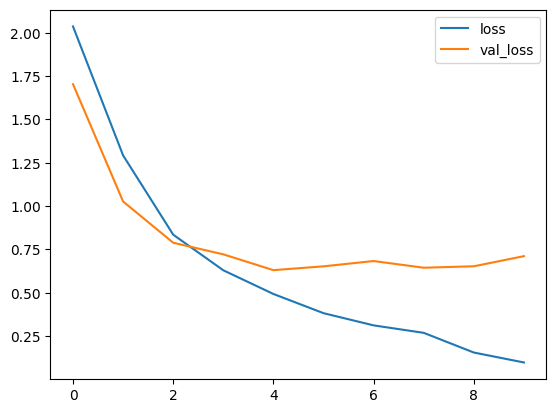

In [56]:
#График изменения функции потерь
history_df = pd.DataFrame(history_2.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

<Axes: >

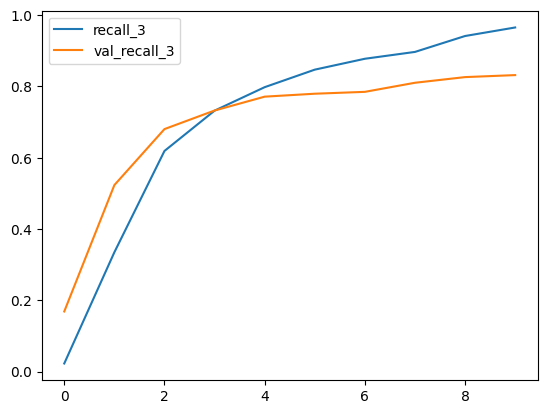

In [57]:
history_df.loc[:, ['recall_3', 'val_recall_3']].plot()

<Axes: >

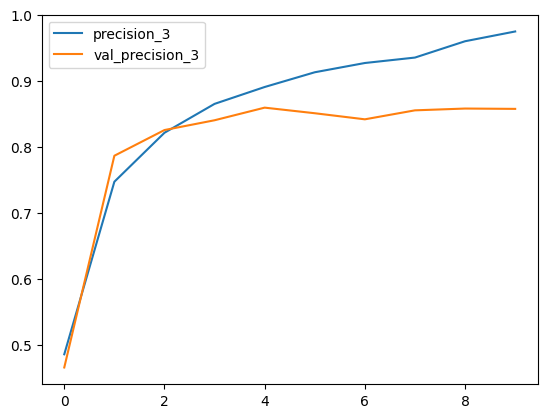

In [58]:
history_df.loc[:, ['precision_3', 'val_precision_3']].plot()

In [61]:
preds = model_2.predict(X_test)
preds = np.argmax(preds, axis=1)
y_test_idx = np.argmax(y_test, axis=1)

63/63 [==============================] - 1s 17ms/step


In [63]:
print(classification_report(y_test_idx, preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       208
           1       0.92      0.94      0.93       189
           2       0.85      0.80      0.83       199
           3       0.71      0.73      0.72       208
           4       0.83      0.88      0.85       196
           5       0.75      0.75      0.75       202
           6       0.90      0.90      0.90       214
           7       0.93      0.85      0.89       199
           8       0.93      0.91      0.92       194
           9       0.89      0.90      0.89       191

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



Text(0.5, 1.0, 'Predicted class:9  Real class:9')

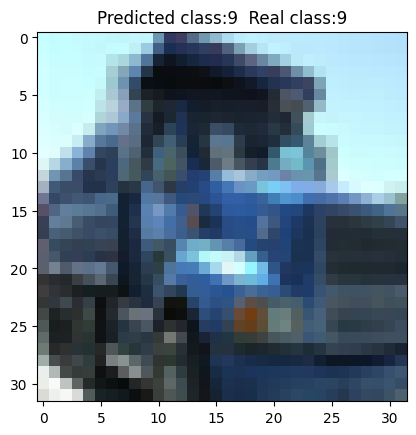

In [64]:
i = 0
plt.imshow(X_test[i])
plt.title('Predicted class:'+str(preds[i])+'  Real class:'+str(y_test_idx[i]))

# Тест итоговой модели

Text(0.5, 1.0, 'Predicted class:3  Real class:0')

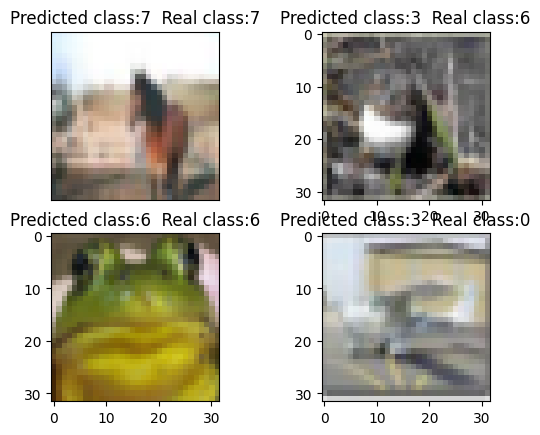

In [65]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(X_test[1])
axs[0, 0].set_title('Predicted class:'+str(preds[1])+'  Real class:'+str(y_test_idx[1]))
axs[0, 0].set(xticks=[], yticks=[])
axs[0, 1].imshow(X_test[3])
axs[0, 1].set_title('Predicted class:'+str(preds[3])+'  Real class:'+str(y_test_idx[3]))
axs[1, 0].imshow(X_test[10])
axs[1, 0].set_title('Predicted class:'+str(preds[10])+'  Real class:'+str(y_test_idx[10]))
axs[1, 1].imshow(X_test[25])
axs[1, 1].set_title('Predicted class:'+str(preds[25])+'  Real class:'+str(y_test_idx[25]))

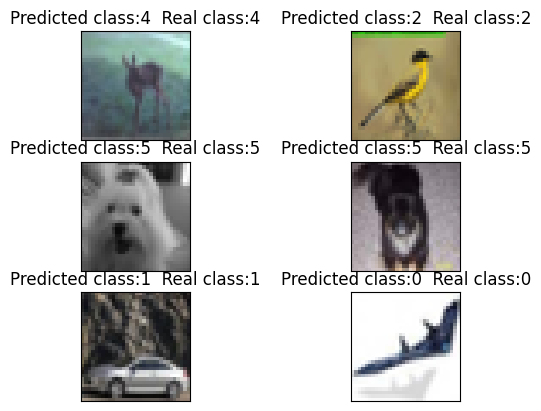

In [67]:
h, w = (2, 3)
fig, axs = plt.subplots(w, h)
for i in range(w):
    for j in range(h):
        num = np.random.randint(2000)
        axs[i, j].imshow(X_test[num])
        axs[i, j].set_title('Predicted class:'+str(preds[num])+'  Real class:'+str(y_test_idx[num]))
        axs[i, j].set(xticks=[], yticks=[])